In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import os
import cv2

import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = ['Normal', 'Potholes']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data('drive/MyDrive/Dataset')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


<ipython-input-3-4fc451c4081d>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
data_t = []
data_l = []
for feature, label in data:
  data_t.append(feature)
  data_l.append(label)


X_new = np.array(data_t)
y_new = np.array(data_l)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.40)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:

x_train = []
y_train = []
x_val = []
y_val = []
#x_test = []
#y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

'''
for feature, label in test:
  x_test.append(feature)
  y_test.append(label)
''''

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

''''
x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
''''

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
model_file = 'model/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5'

#maximizing val_accuracy, store only the best models  
checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq="epoch")

#If after 3 epochs the val_accuracy does not improve just stop 
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')

In [ ]:
history = model.fit(x_train,y_train,epochs = 500,batch_size = 32, validation_data = (x_val, y_val), verbose = 2,shuffle = True,callbacks = [checkpoint,early])

Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.53915, saving model to model/weights.01-0.54.hdf5
42/42 - 16s - loss: 0.6698 - accuracy: 0.5168 - val_loss: 0.6445 - val_accuracy: 0.5391 - 16s/epoch - 376ms/step
Epoch 2/500

Epoch 2: val_accuracy did not improve from 0.53915
42/42 - 3s - loss: 0.6513 - accuracy: 0.5071 - val_loss: 0.6221 - val_accuracy: 0.5391 - 3s/epoch - 78ms/step
Epoch 3/500

Epoch 3: val_accuracy improved from 0.53915 to 0.57718, saving model to model/weights.03-0.58.hdf5
42/42 - 4s - loss: 0.6315 - accuracy: 0.5340 - val_loss: 0.5976 - val_accuracy: 0.5772 - 4s/epoch - 83ms/step
Epoch 4/500

Epoch 4: val_accuracy improved from 0.57718 to 0.66443, saving model to model/weights.04-0.66.hdf5
42/42 - 4s - loss: 0.6145 - accuracy: 0.5795 - val_loss: 0.5730 - val_accuracy: 0.6644 - 4s/epoch - 89ms/step
Epoch 5/500

Epoch 5: val_accuracy improved from 0.66443 to 0.75839, saving model to model/weights.05-0.76.hdf5
42/42 - 4s - loss: 0.5887 - accuracy: 0.6960 - val_loss: 0.5

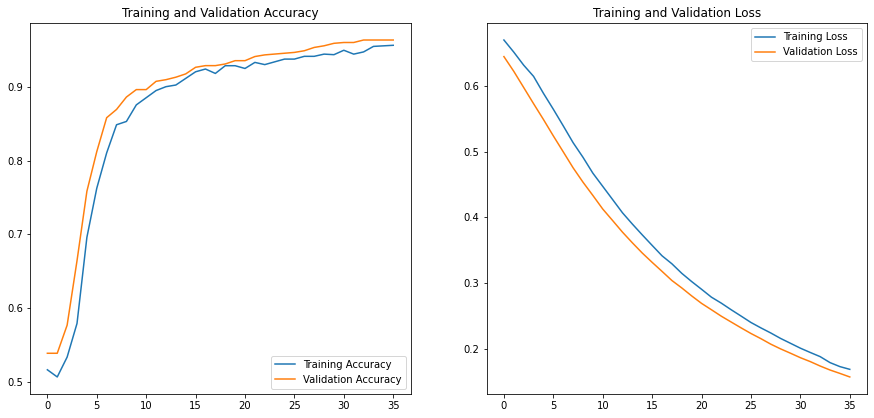

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(36)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred=model.predict(x_val)
y_pred=np.argmax(y_pred,axis=1)

28/28 [==============================] - 1s 16ms/step


In [ ]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       405
           1       0.97      0.96      0.97       489

    accuracy                           0.96       894
   macro avg       0.96      0.96      0.96       894
weighted avg       0.96      0.96      0.96       894



In [ ]:
print(confusion_matrix(y_pred,y_val))

[[392  13]
 [ 20 469]]


In [ ]:
def performance_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i] == y_hat[i]==1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] == 0:
            FP += 1
        if y_hat[i] == y_actual[i] == 0:
            TN +=1
        if y_hat[i] == 0 and y_actual[i] == 1:
            FN +=1

    return(TP, FP, TN, FN)

In [ ]:
TP, FP, TN, FN = performance_measure(y_val,y_pred)

In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC)

0.9730290456431535 0.9514563106796117 0.9591002044989775 0.9679012345679012 0.04854368932038835 0.026970954356846474 0.0408997955010225 0.9630872483221476


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [ ]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

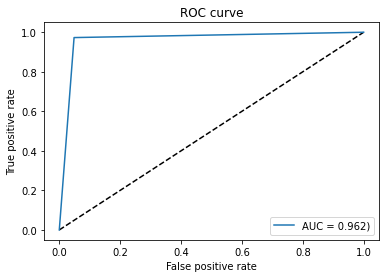

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [3]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

1/1 [==============================] - 0s 27ms/step


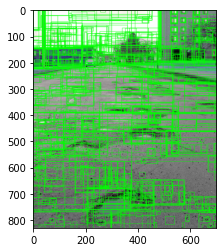

In [6]:
z=0
from keras.models import load_model
model_final = load_model('weights.33-0.96.hdf5')

path_test = '/content/drive/MyDrive/AData/test'
for e,i in enumerate(os.listdir(path_test)):
  #if i.startswith("4"):
  z += 1
  img = cv2.imread(os.path.join(path_test,i))
  ss.setBaseImage(img)
  ss.switchToSelectiveSearchFast()
  ssresults = ss.process()
  imout = img.copy()
  for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][1] > 0.70:
          cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)